# Pymaceuticals Inc.
---

### Analysis

- 248 mice were studied to analyze the effect of different drug regimens (+ a placebo) on the volumes of tumors caused by squamous cell carcinoma (SCC).
- The mice we distributed roughly equaly between male (51.0%) and female (49.0%).
- Two drugs showed more promise, with a lower mean tumor volume, namely Capomulin (40.67 mm3) and Ramicane (40.22 mm3). All other drugs had tumor volumes between 52 and 56 mm3, not considerably different from the placebo (54.03 mm3).
- Capomulin and Ramicane also had the lowest standard deviations (<5) showing close results among different mice.
- There was one particular case of a mouse treated with Infubinol who attained a final tumor volume of 36.32 mm3, comparable to the final volumes attained with Capomulin and Ramicane. But this case appears to be an outlier that can be ignored, since it is considerably below the final volumes attained by all other Infubinol mice (between ~55 and ~65 mm3).
- An example of the tumor progression of a Capomulin mouse(Mouse ID = b128) is shown below showing how the tumor's size decreased as treatment progressed.
- We are able to see a strong positive correlation (0.84) between the weight of mice and the average tumor volume, in mice that were given the Capomulin treatment.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [20]:
# Checking the number of mice.
unique_mice = mouse_results["Mouse ID"].unique()
mice_count = len(unique_mice)
print(mice_count)

249


In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Group by Mouse ID and TimePoint
grouped_results = mouse_results.groupby(["Mouse ID", "Timepoint"]).count()

#Get Instances where there are duplicates
duplicate_data = grouped_results.loc[grouped_results["Tumor Volume (mm3)"]>1]

#Get duplicate Mouse ID(s)
duplicate_mice = []
duplicate_values = duplicate_data.index.get_level_values("Mouse ID").unique()
for mouse in duplicate_values:
    duplicate_mice.append(duplicate_values[0])

duplicate_mice

['g989']

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_results = mouse_results.loc[mouse_results["Mouse ID"].isin(duplicate_mice)]
duplicate_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.loc[-mouse_results["Mouse ID"].isin(duplicate_mice) ]
clean_mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_mouse_results["Mouse ID"].unique()
mice_count = len(unique_mice)
print(mice_count)

248


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_results = clean_mouse_results.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = summary_results["Tumor Volume (mm3)"].mean()
median_tumor_volume = summary_results["Tumor Volume (mm3)"].median()
tumor_volume_variance = summary_results["Tumor Volume (mm3)"].var()
tumor_volume_stdev = summary_results["Tumor Volume (mm3)"].std()
tumor_volume_stderr = summary_results["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                 "Median Tumor Volume": median_tumor_volume,
                                 "Tumor Volume Variance": tumor_volume_variance,
                                 "Tumor Volume Std. Dev.": tumor_volume_stdev,
                                  "Tumor Volume Std. Err.": tumor_volume_stderr })
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary = clean_mouse_results.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

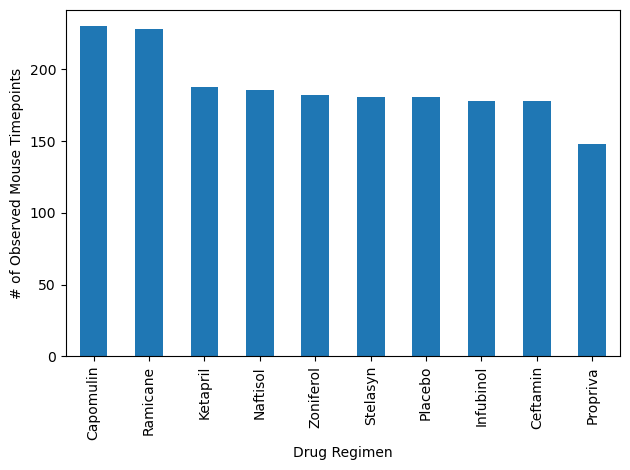

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoints = clean_mouse_results["Drug Regimen"].value_counts()
drug_timepoints.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints" )
plt.tight_layout()
plt.show()


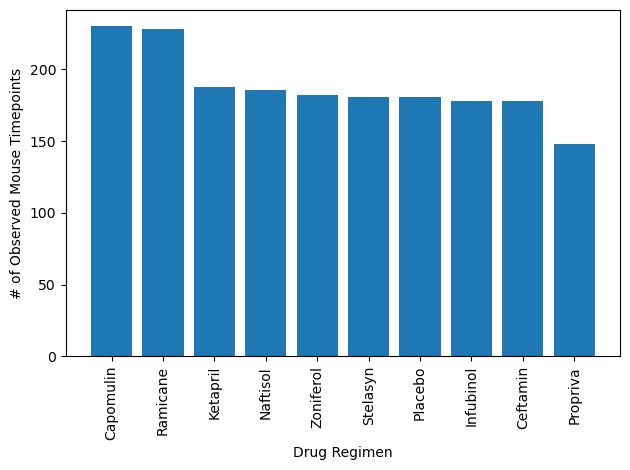

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_timepoints = clean_mouse_results["Drug Regimen"].value_counts()

x_axis = drug_timepoints.index.values
counts = []

plt.bar(x_axis, drug_timepoints)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

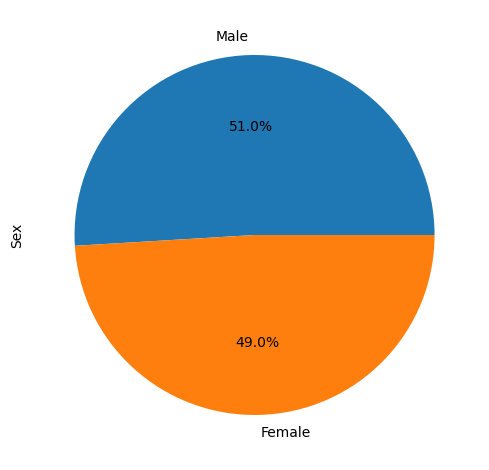

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_mouse_results["Sex"].value_counts()
mouse_sex.plot(kind = "pie", ylabel = "Sex", autopct="%1.1f%%" )
plt.tight_layout()
plt.show()

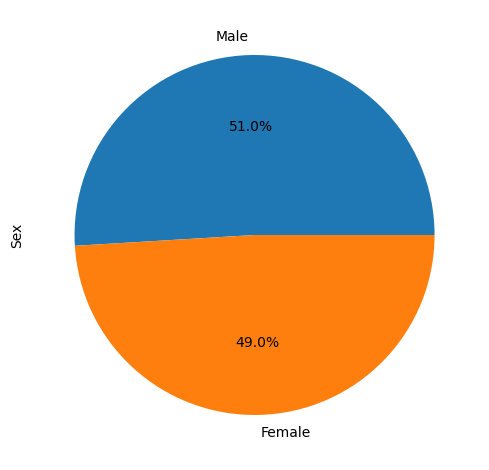

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = clean_mouse_results["Sex"].value_counts()
labels = mouse_sex.index.values

plt.pie(mouse_sex, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_mouse_results.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumorvolume = pd.merge(last_timepoints, clean_mouse_results, on=["Mouse ID", "Timepoint"], how="left")

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = last_tumorvolume.loc[last_tumorvolume["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volumes.append(volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    outliers = last_tumorvolume.loc[(last_tumorvolume["Drug Regimen"] == drug) & ((last_tumorvolume["Tumor Volume (mm3)"] > upperq+1.5*iqr) | (last_tumorvolume["Tumor Volume (mm3)"] < lowerq-1.5*iqr))]["Tumor Volume (mm3)"]
    print(f'{drug}\'s potential outliers: {outliers} ')

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 


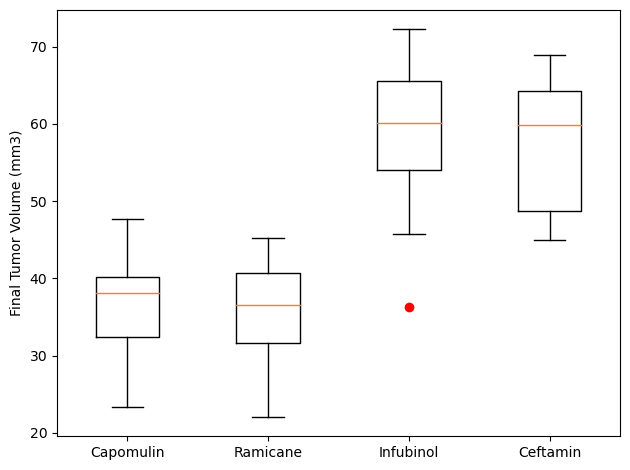

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')


ax1.boxplot(tumor_volumes, labels=treatments, sym='r')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

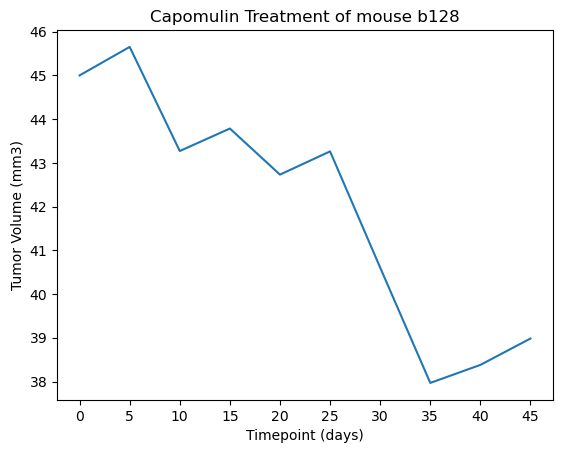

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Get first (min) instance of mouse with Capomulin as treatment
capomulin_mouse_id = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Capomulin", ["Mouse ID"]].min()

#Get the above mouse's data
capomulin_mouse_data = clean_mouse_results.loc[clean_mouse_results["Mouse ID"]==capomulin_mouse_id["Mouse ID"]]
capomulin_mouse_data = capomulin_mouse_data.reset_index()

capomulin_mouse_data["Tumor Volume (mm3)"].plot(kind="line")
x_axis = np.arange(len(capomulin_mouse_data["Timepoint"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, capomulin_mouse_data["Timepoint"].values)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse " + capomulin_mouse_id["Mouse ID"])
plt.show()



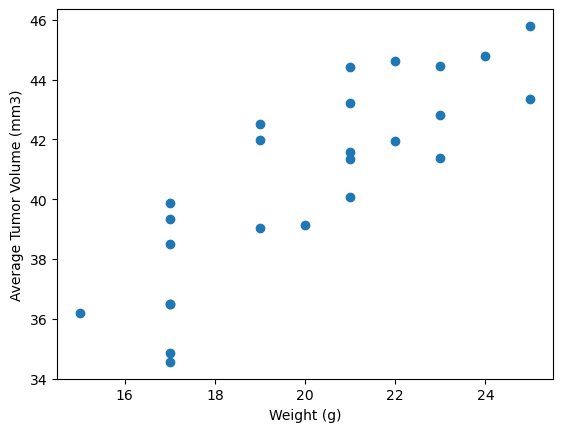

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Capomulin",]
grouped_capomulin = capomulin_mice.groupby("Mouse ID")

Weights = grouped_capomulin["Weight (g)"].mean()
tumor_volumes = grouped_capomulin["Tumor Volume (mm3)"].mean()
plt.scatter(Weights, tumor_volumes)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between Mouse Weight and Average Tumor Volume is 0.84


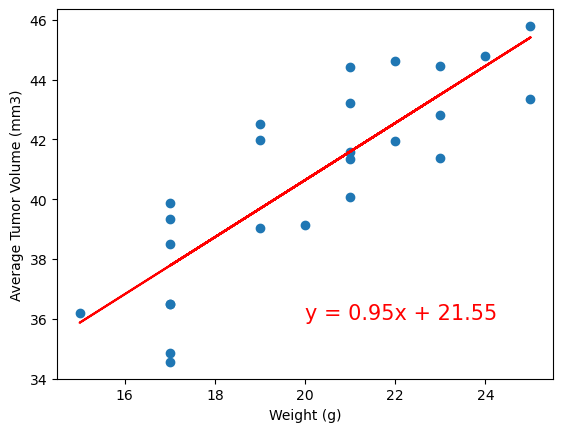

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(Weights,tumor_volumes)
print(f"The correlation between Mouse Weight and Average Tumor Volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Weights, tumor_volumes)
regress_values = Weights * slope + intercept

plt.scatter(Weights,tumor_volumes)
plt.plot(Weights,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()